<a href="https://colab.research.google.com/github/thanit456/NeuroSummary/blob/master/headline_generation_sentence_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
!pip install tensorflow_text
!pip install pythainlp

     |████████████████████████████████| 11.1MB 2.5MB/s 
     |████████████████████████████████| 1.4MB 47.9MB/s 
  Created wheel for nltk: filename=nltk-3.5-cp36-none-any.whl size=1434676 sha256=9f39759dc9b9924f0cce0b4c001561ec68f527e0f7d847396c7e8ddbdfe26c05
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode
import tqdm

import tensorflow_hub as hub
import tensorflow_text
import tensorflow as tf

from pythainlp.corpus.common import thai_stopwords

In [0]:
old_df = pd.read_pickle('/content/drive/Shared drives/NeuroSummary/data/all_deepcut_crfcut_thaigov_1_24.pkl')
sentence_df = pd.DataFrame({'content': old_df['tokenized_crfcut_content'], 'headline': old_df['tokenized_crfcut_headline'], 'class': old_df['class_name']})

In [12]:
sentence_df.head()

,content,headline,class
0,[ธนาคารอาคารสงเคราะห์ (ธอส.) ประกาศมาตรการบรรเ...,[ธอส.ประกาศมาตรการบรรเทาความเดือดร้อนลูกค้าจาก...,ด้านเศรษฐกิจ
1,[พลเอก ประยุทธ์ จันทร์โอชา นายกรัฐมนตรีได้กล่า...,[สรุปประเด็นนายกรัฐมนตรีกล่าวในรายการศาสตร์พระ...,ข่าวทำเนียบรัฐบาล
2,[รมว.แรงงาน ยื่นสัตยาบันอนุสัญญา ILO ฉบับที่ 1...,[“บิ๊กอู๋”ยื่นสัตยาบัน C188 ต่อ ILO แสดงเจตนาร...,ด้านความมั่นคง
3,[ออมสินจัดโปรพิเศษ Thailand Smart Money กรุงเท...,[ออมสิน จัดโปรโมชั่นพิเศษ Thailand Smart Money...,ด้านเศรษฐกิจ
4,[ศ.คลินิก นพ.อุดม คชินทร รมช.ศธ. ประชุมหารือกั...,[ม.มหิดล เตรียมร่วมมือกับ ม.บูรพา ผลิตพัฒนากำล...,ด้านการศึกษาฯ


In [0]:
# def remove_space_special(content_arr) :
#   return list(filter(lambda x: x not in " (){}!,'`<>=@_:;,\'\"\\”“‘’",np.array(content_arr)))

# df.headline = df.headline.apply(remove_space_special)
# df.content = df.content.apply(remove_space_special)
# df_stop.headline = df_stop.headline.apply(remove_space_special)
# df_stop.content = df_stop.content.apply(remove_space_special)

In [0]:
sentence_embedding = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual/3")

In [19]:
sentence_df.iloc[0]['content'][0]

'ธนาคารอาคารสงเคราะห์ (ธอส.) ประกาศมาตรการบรรเทาความเดือดร้อนให้กับลูกค้าของธนาคารที่ได้รับผลกระทบจากอิทธิพลของพายุโซนร้อน “ปาบึก” เพิ่มเติมด้วย '

In [21]:
sentence = sentence_embedding(sentence_df.iloc[0]['content'][0])
sentence.shape

TensorShape([1, 512])

In [22]:
df = sentence_df

# the maximum number of sentence in content and headline
max_len_headline = max(df.headline.apply(lambda x: len(x)))
print("max length headline : ",max_len_headline)
max_len_content = max(df.content.apply(lambda x: len(x)))
print("max length content : ",max_len_content)

max length headline :  4
max length content :  764


In [26]:
def find_max_num_char(df, column):
  max_ls = []
  for i in range(len(df)):
    maxx = 0
    longest_sent = ''
    for sentence in df.iloc[i][column]:
      if len(sentence) > maxx:
        maxx = len(sentence)
        longest_sent = sentence
    max_ls.append((maxx, longest_sent))
  return max(max_ls)

# the maximum number of characters in content and headline
(max_char_headline, longest_sent_headline) = find_max_num_char(df, column='headline')
print("max char in each sentence in Headline : ", max_char_headline)
print("longest sentence in Headline          : ", longest_sent_headline)
(max_char_content, longest_sent_content) = find_max_num_char(df, column='content')
print("max char in each sentence in Content : ", max_char_content)
print("longest sentence in Content          : ", longest_sent_content)


max char in each sentence in Headline :  217
longest sentence in Headline          :  รองปลัดกระทรวงอุตสาหกรรม นำคณะสื่อมวลชนจากส่วนกลางและท้องถิ่นกว่า 20 ท่าน เยี่ยมชม บริษัท ที แกลเลอรี่ กรุ๊ป (ประเทศไทย) จำกัด ผู้ผลิตและจำหน่ายชาสมุนไพร ที่ได้รับเงินทุนจำนวน 3 ล้านบาทจากกองทุนเอสเอ็มอีตามแนวประชารัฐ
max char in each sentence in Content :  8580
longest sentence in Content          :  “EXIM BANK เร่งเดินหน้าพัฒนาองค์กรและขับเคลื่อนยุทธศาสตร์การค้าและการลงทุนระหว่างประเทศ โดยนำพาผู้ประกอบการไทยไปสู่โอกาสใหม่ๆ ทางธุรกิจที่เกิดขึ้น โดยเฉพาะในตลาดใหม่ ด้วยการทำงานร่วมกันกับภาครัฐและเอกชนในการเพิ่มขีดความสามารถในการแข่งขันของผู้ประกอบการไทยด้วยความพร้อมทั้งด้านเครือข่ายธุรกิจ การเงิน และองค์ความรู้ นำไปสู่การพัฒนาประเทศไทยอย่างยั่งยืน” นายพิศิษฐ์กล่าว สอบถามรายละเอียดเพิ่มเติมได้ที่ส่วนสื่อสารองค์กร ฝ่ายเลขานุการและสื่อสารองค์กร EXIM BANK สำนักงานใหญ่ โทร. 0 2271 3700, 0 2278 0047, 0 2617 2111 ต่อ 1141, 1144 EXIM Thailand Celebrates 25th Anniversary Promoting Thai Entrepreneurs’ Opportunit

In [0]:
def get_num_sent(df, column):
  ls = []
  for i in range(len(df)):
    for sentence in df.iloc[i][column]:
      ls.append(len(sentence))
  return ls

Mode of #sentence :  74


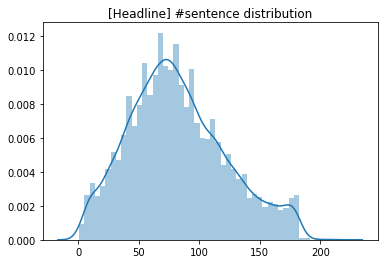

In [58]:
headline_sentence_dist = get_num_sent(df, column='headline')

print('Mode of #sentence : ', mode(headline_sentence_dist))
plt.title('[Headline] #sentence distribution')
sns.distplot(headline_sentence_dist);

Mode of #sentence :  9


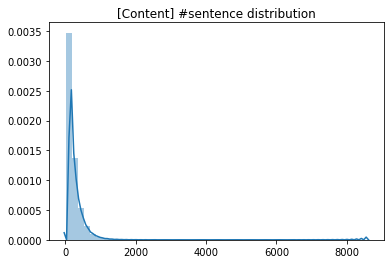

In [59]:
content_sentence_dist = get_num_sent(df, column='content')

print('Mode of #sentence : ', mode(content_sentence_dist))
plt.title('[Content] #sentence distribution')
sns.distplot(content_sentence_dist);

In [0]:
def get_num_char_sent(df, column):
  ls = []
  for i in range(len(df)):
    for sentence in df.iloc[i][column]:
      ls.append(len(sentence))
  return ls

Mode of #chars in each sentence :  74


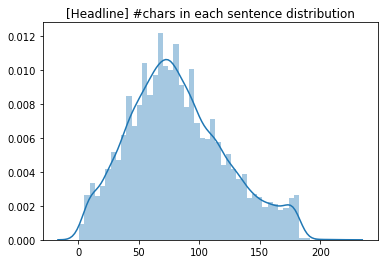

In [52]:
headline_dist = get_num_char_sent(df, column='headline')

print('Mode of #chars in each sentence : ', mode(headline_dist))
plt.title('[Headline] #chars in each sentence distribution')
sns.distplot(headline_dist);

Mode of #chars in each sentence :  9


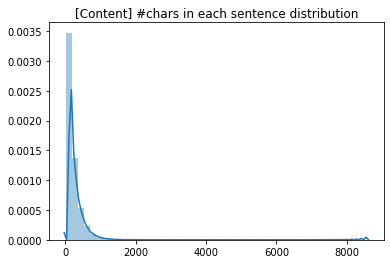

In [53]:
content_dist = get_num_char_sent(df, column='content')

print('Mode of #chars in each sentence : ', mode(content_dist))
plt.title('[Content] #chars in each sentence distribution')
sns.distplot(content_dist);

In [57]:
def get_sentence2vector(df, column):
  ls = []
  for i in tqdm.tqdm(range(len(df))):
    tmp = []
    for sentence in df.iloc[i][column]:
      tmp.append(sentence_embedding(sentence))
    ls.append(tmp)
  return ls

sent_vec_content = get_sentence2vector(df, column='content')
sent_vec_headline = get_sentence2vector(df, column='headline')

df['content_vector'] = sent_vec_content
df['content_headline'] = sent_vec_headline

100%|██████████| 17367/17367 [03:52<00:00, 74.70it/s]


In [0]:
import pickle
drive_path = '/content/drive/Shared drives/NeuroSummary/data/two_data_playground/'

with open(drive_path + 'sentence2vec_universal_df.pkl', 'wb') as f:
  pickle.dump(df, f)

In [0]:
eiei_df = pd.read_pickle(drive_path + 'sentence2vec_universal_df.pkl')

In [74]:
eiei_df.head()

,content,headline,class,content_vector,content_headline
0,[ธนาคารอาคารสงเคราะห์ (ธอส.) ประกาศมาตรการบรรเ...,[ธอส.ประกาศมาตรการบรรเทาความเดือดร้อนลูกค้าจาก...,ด้านเศรษฐกิจ,"[((tf.Tensor(-0.03886919, shape=(), dtype=floa...","[((tf.Tensor(-0.05122369, shape=(), dtype=floa..."
1,[พลเอก ประยุทธ์ จันทร์โอชา นายกรัฐมนตรีได้กล่า...,[สรุปประเด็นนายกรัฐมนตรีกล่าวในรายการศาสตร์พระ...,ข่าวทำเนียบรัฐบาล,"[((tf.Tensor(-0.015753765, shape=(), dtype=flo...","[((tf.Tensor(0.032791086, shape=(), dtype=floa..."
2,[รมว.แรงงาน ยื่นสัตยาบันอนุสัญญา ILO ฉบับที่ 1...,[“บิ๊กอู๋”ยื่นสัตยาบัน C188 ต่อ ILO แสดงเจตนาร...,ด้านความมั่นคง,"[((tf.Tensor(0.021387877, shape=(), dtype=floa...","[((tf.Tensor(-0.009893261, shape=(), dtype=flo..."
3,[ออมสินจัดโปรพิเศษ Thailand Smart Money กรุงเท...,[ออมสิน จัดโปรโมชั่นพิเศษ Thailand Smart Money...,ด้านเศรษฐกิจ,"[((tf.Tensor(-0.041912667, shape=(), dtype=flo...","[((tf.Tensor(-0.014473209, shape=(), dtype=flo..."
4,[ศ.คลินิก นพ.อุดม คชินทร รมช.ศธ. ประชุมหารือกั...,[ม.มหิดล เตรียมร่วมมือกับ ม.บูรพา ผลิตพัฒนากำล...,ด้านการศึกษาฯ,"[((tf.Tensor(0.0074925586, shape=(), dtype=flo...","[((tf.Tensor(-0.007146186, shape=(), dtype=flo..."


In [0]:
-